<AxesSubplot:>

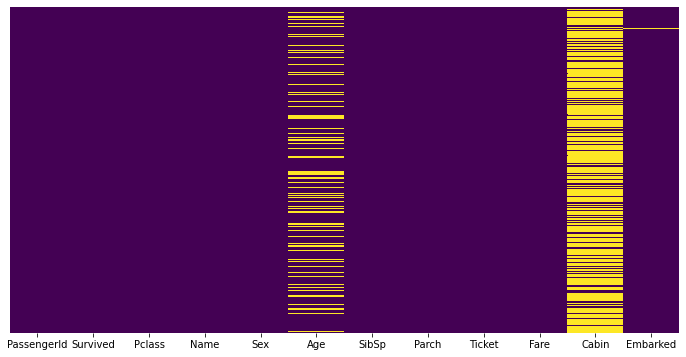

In [1]:
import pandas
from matplotlib import pyplot
import seaborn

%matplotlib inline

titanic_train = pandas.read_csv('titanic_train.csv')

pyplot.figure(figsize=(12, 6))
seaborn.heatmap(titanic_train.isnull(), cmap='viridis', yticklabels=False, cbar=False)



<AxesSubplot:xlabel='Survived', ylabel='count'>

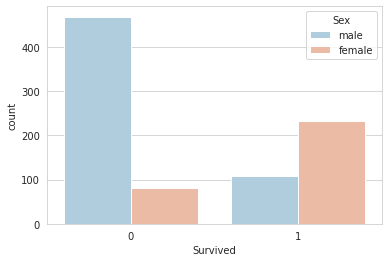

In [2]:
seaborn.set_style('whitegrid')
seaborn.countplot(x='Survived', data=titanic_train, hue='Sex', palette='RdBu_r')

<AxesSubplot:>

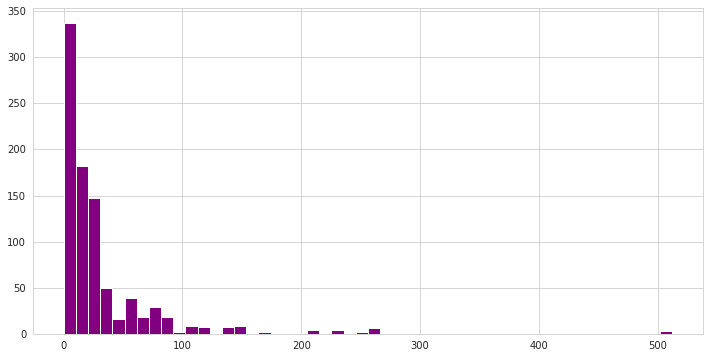

In [3]:
titanic_train['Fare'].hist(color='purple', bins=50, figsize=(12, 6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

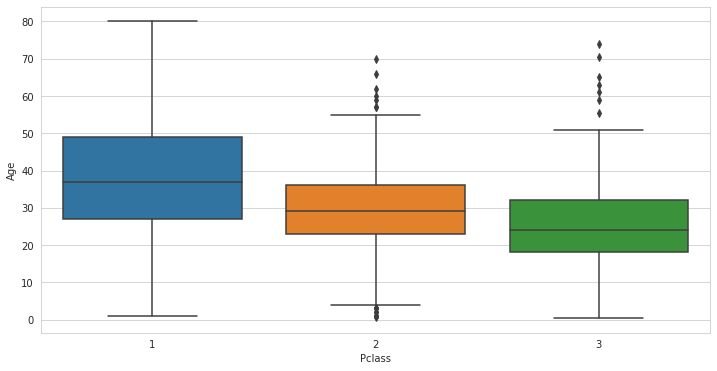

In [7]:
pyplot.figure(figsize=(12, 6))
seaborn.boxplot(x='Pclass', y='Age', data=titanic_train)

<AxesSubplot:>

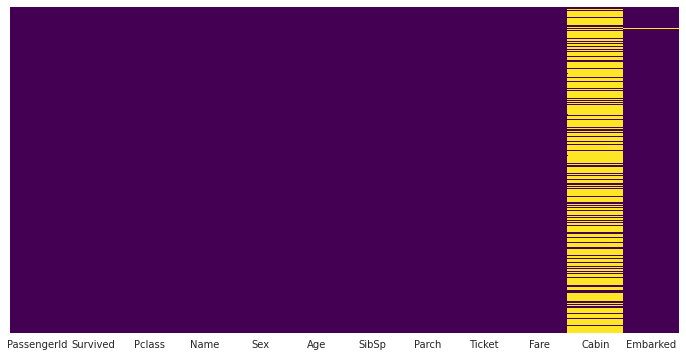

In [4]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pandas.isnull(age):
        if pclass == 1:
            return 37
        elif  pclass == 2:
            return 29
        else:
            return 24
    return age               

titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(input_age, axis=1)

pyplot.figure(figsize=(12, 6))
seaborn.heatmap(titanic_train.isnull(), cmap='viridis', yticklabels=False, cbar=False)


<AxesSubplot:>

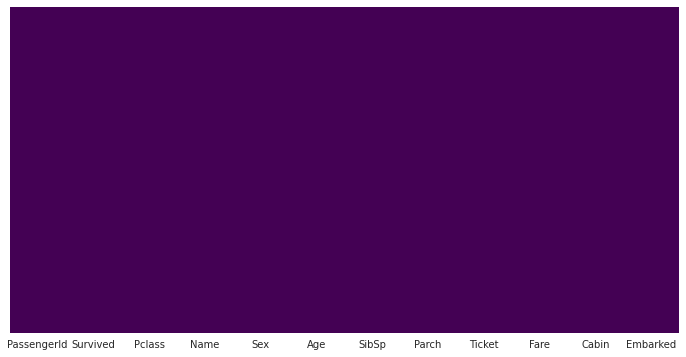

In [8]:
titanic_train.dropna(inplace=True)
pyplot.figure(figsize=(12, 6))
seaborn.heatmap(titanic_train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [9]:
sex = pandas.get_dummies(titanic_train['Sex'], drop_first=True)
sex

male
1       0
3       0
6       1
10      0
11      0
..    ...
871     0
872     1
879     0
887     0
889     1

[202 rows x 1 columns]

In [10]:
titanic_train['Embarked'].value_counts()

S    129
C     69
Q      4
Name: Embarked, dtype: int64

In [11]:
embarked = pandas.get_dummies(titanic_train['Embarked'], drop_first=True)
embarked

Q  S
1    0  0
3    0  1
6    0  1
10   0  1
11   0  1
..  .. ..
871  0  1
872  0  1
879  0  0
887  0  1
889  0  0

[202 rows x 2 columns]

In [14]:
titanic_train = pandas.concat([titanic_train, sex, embarked], axis=1)
titanic_train


Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
1           1       1  38.0      1      0  71.2833     0  0  0
3           1       1  35.0      1      0  53.1000     0  0  1
6           0       1  54.0      0      0  51.8625     1  0  1
10          1       3   4.0      1      1  16.7000     0  0  1
11          1       1  58.0      0      0  26.5500     0  0  1
..        ...     ...   ...    ...    ...      ...   ... .. ..
871         1       1  47.0      1      1  52.5542     0  0  1
872         0       1  33.0      0      0   5.0000     1  0  1
879         1       1  56.0      0      1  83.1583     0  0  0
887         1       1  19.0      0      0  30.0000     0  0  1
889         1       1  26.0      0      0  30.0000     1  0  0

[202 rows x 9 columns]

In [12]:
titanic_train.drop(['Sex', 'Embarked', 'Ticket', 'PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)


In [15]:
titanic_train

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
1           1       1  38.0      1      0  71.2833     0  0  0
3           1       1  35.0      1      0  53.1000     0  0  1
6           0       1  54.0      0      0  51.8625     1  0  1
10          1       3   4.0      1      1  16.7000     0  0  1
11          1       1  58.0      0      0  26.5500     0  0  1
..        ...     ...   ...    ...    ...      ...   ... .. ..
871         1       1  47.0      1      1  52.5542     0  0  1
872         0       1  33.0      0      0   5.0000     1  0  1
879         1       1  56.0      0      1  83.1583     0  0  0
887         1       1  19.0      0      0  30.0000     0  0  1
889         1       1  26.0      0      0  30.0000     1  0  0

[202 rows x 9 columns]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
                                    titanic_train.drop('Survived', axis=1), 
                                    titanic_train['Survived'], test_size=0.3
                                   )

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train) 

LogisticRegression()

In [31]:
from sklearn.metrics import classification_report

predictions = logistic_model.predict(X_test)

print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.84      0.82      0.83        39

    accuracy                           0.79        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))